# The Normal Equation 

Para encontrar el valor de **θ** que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. A esto se le llama Ecuación Normal: 

Ecuación normal: $\theta = (X^{T}X)^{-1}X^{T}Y$

* $\theta$ es el valor de θ que minimiza la función de costo.

* Y es el vector de valores objetivo que contiene $Y^{(1)}$ hacia $Y^{(m)}$

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib traza las figuras en línea y preparemos una función para guardar las figuras. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos encarecidamente que use Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [2]:
# Verificamos que Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Verificamos que Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Importamos bibliotecas comunes
import numpy as np
import os

# Para que salgan resultados semejantes
np.random.seed(42)

# Para pintar bonitas figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lugar donde se guardaran las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Para ignorar adventencias que no son necesarias
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Vamos a generar algunos datos de apariencia lineal para probar esta ecuación: 

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Mostremos el conjunto de datos lineales generados aleatoriamente

Saving figure generated_data_plot


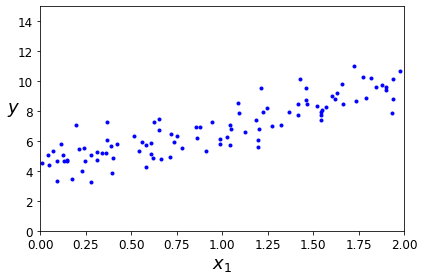

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Ahora calculemos $\theta$ usando la ecuación normal. Usaremos la función inv() del módulo de Álgebra lineal de NumPy (np.linalg) para calcular la inversa de una matriz, y el método dot() para la multiplicación de matrices: 

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # agregue x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

La función real que usamos para generar los datos es y = 4 + 3x1 + ruido gaussiano. Veamos qué encontró la ecuación:

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $\theta_{0}$ = 4 y $\theta_{1}$ = 3 en lugar de $\theta_{0}$ = 4.215 y $\theta_{1}$ = 2.770. Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetros exactos de la función original. 

Ahora harémos predicciones usando θ:

In [28]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  #  agregue x0 = 1 a cada instancia
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Tracemos las predicciones de este modelo

In [31]:
'''
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
'''

'\nplt.plot(X_new, y_predict, "r-")\nplt.plot(X, y, "b.")\nplt.axis([0, 2, 0, 15])\nplt.show()\n'

Realizar una regresión lineal usando Scikit-Learn es bastante simple:

Saving figure linear_model_predictions_plot


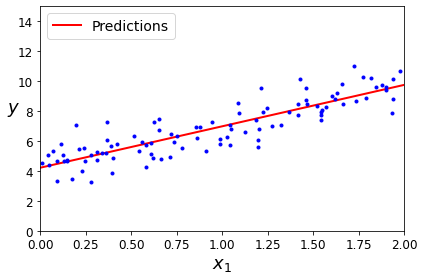

In [32]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [34]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La clase LinearRegression se basa en la función scipy.linalg.lstsq () (el nombre significa "mínimos cuadrados"), a la que puede llamar directamente:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula $\theta$ = $X^+$ + y, donde $X^+$ + es el pseudoinverso de X (específicamente el inverso de Moore-Penrose). Puede usar np.linalg.pinv () para calcular la pseudoinversa directamente:

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

El pseudoinverso en sí mismo se calcula usando una técnica de factorización de matrices estándar llamada Descomposición de valores singulares (SVD) que puede descomponer la matriz **X** del conjunto de entrenamiento en la multiplicación de tres matrices **U Σ** $V^T$ (ver numpy.linalg.svd ()). La pseudoinversa se calcula como $X^+$ = $VΣ^+U^T$. Para calcular la matriz $Σ^+$, el algoritmo toma Σ y pone a cero todos los valores menores que un pequeño valor de umbral, luego reemplaza todos los valores distintos de cero con su inverso, y finalmente transpone la matriz resultante. Este enfoque es más eficiente que calcular la ecuación normal, y además maneja bien los casos extremos: de hecho, la ecuación normal puede no funcionar si la matriz $X^T$X no es invertible (es decir, singular), como si m < n o si algunas características son redundante, pero el pseudoinverso siempre está definido.

# Complejidad computacional

La ecuación normal calcula la inversa de $X^T X$, que es una matriz (n + 1) × (n + 1) (donde n es el número de características). La complejidad computacional de invertir tal matriz es típicamente de aproximadamente O ($n^2.4$) a O ($n^3$) (dependiendo de la implementación). En otras palabras, si duplica el número de características, multiplica el tiempo de cálculo por aproximadamente $2^2,4$ = 5,3 a $2^3$ = 8. 

El enfoque SVD utilizado por la clase LinearRegression de Scikit-Learn es aproximadamente O ($n^2$). Si duplica la cantidad de funciones, multiplica el tiempo de cálculo por aproximadamente 4.

>Tanto la ecuación normal como el enfoque SVD se vuelven muy lentos cuando la cantidad de características aumenta (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son O (m)), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que puedan caber en la memoria.

Además, una vez que haya entrenado su modelo de regresión lineal (usando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto a la cantidad de instancias en las que desea hacer predicciones y la cantidad de características. En otras palabras, hacer predicciones en el doble de instancias (o el doble de funciones) llevará aproximadamente el doble de tiempo. Ahora veremos formas muy diferentes de entrenar un modelo de regresión lineal, más adecuado para casos donde hay una gran cantidad de características o demasiadas instancias de entrenamiento para caber en la memoria.

# Gradient Descent

Gradient Descent es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general de Gradient Descent es ajustar los parámetros de forma iterativa para minimizar una función de coste.

Suponga que está perdido en las montañas en una densa niebla; solo puedes sentir la pendiente del suelo debajo de tus pies. Una buena estrategia para llegar rápidamente al fondo del valle es descender en dirección a la pendiente más pronunciada. Esto es exactamente lo que hace Gradient Descent: mide el gradiente local de la función de error con respecto al vector de parámetros θ, y va en la dirección del gradiente descendiente. Una vez que el gradiente es cero, ¡ha alcanzado un mínimo!

Concretamente, comienza llenando θ con valores aleatorios (esto se llama inicialización aleatoria), y luego lo mejora gradualmente, dando un pequeño paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converja al mínimo:

![1](https://user-images.githubusercontent.com/63415652/104545505-d68c5d80-55ef-11eb-943c-fe01aed20c8b.PNG)

Un parámetro importante en Gradient Descent es el tamaño de los pasos, determinado por el hiperparámetro de tasa de aprendizaje. Si la tasa de aprendizaje es demasiado pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que llevará mucho tiempo: 

![2](https://user-images.githubusercontent.com/63415652/104545665-3a168b00-55f0-11eb-9a6c-eb2014d0d9cc.PNG)

Por otro lado, si la tasa de aprendizaje es demasiado alta, podría saltar a través del valle y terminar en el otro lado, posiblemente incluso más alto de lo que estaba antes. Esto podría hacer que el algoritmo diverja, con valores cada vez mayores, sin encontrar una buena solución:

![3](https://user-images.githubusercontent.com/63415652/104545887-a2656c80-55f0-11eb-9d96-c42aaf3c97f1.PNG)

Por último, no todas las funciones de coste se ven como buenos cuencos normales. Puede haber huecos, crestas, mesetas y todo tipo de terrenos irregulares, lo que dificulta la convergencia al mínimo. La siguiente figura muestra los dos desafíos principales con Gradient Descent: si la inicialización aleatoria inicia el algoritmo de la izquierda, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global. Si comienza a la derecha, tomará mucho tiempo cruzar la meseta, y si se detiene demasiado pronto, nunca alcanzará el mínimo global.

![4](https://user-images.githubusercontent.com/63415652/104546323-89a98680-55f1-11eb-8bc4-de9801badab1.PNG)

Afortunadamente, la función de costo MSE para un modelo de regresión lineal resulta ser una función convexa, lo que significa que si elige dos puntos cualesquiera en la curva, el segmento de línea que los une nunca cruza la curva. Esto implica que no hay mínimos locales, solo un mínimo global. También es una función continua con una pendiente que nunca cambia abruptamente. Estos dos hechos tienen una gran consecuencia: Se garantiza que el descenso del gradiente se acercará arbitrariamente al mínimo global (si espera lo suficiente y si la tasa de aprendizaje no es demasiado alta) .

De hecho, la función de costo tiene la forma de un cuenco, pero puede ser un cuenco alargado si las características tienen escalas muy diferentes. La siguiente figura muestra Gradient Descent en un conjunto de entrenamiento donde las características 1 y 2 tienen la misma escala (a la izquierda), y en un conjunto de entrenamiento donde la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha).

Gradient Descent con y sin escala de características:

![5](https://user-images.githubusercontent.com/63415652/104548011-7dbfc380-55f5-11eb-9e38-0904a7b5a2fa.PNG)

Como puede ver, a la izquierda el algoritmo Gradient Descent va directo hacia el mínimo, alcanzándolo rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global, y termina con una larga marcha. por un valle casi plano. Eventualmente alcanzará el mínimo, pero llevará mucho tiempo.

>Al usar Gradient Descent, debe asegurarse de que todas las funciones tengan una escala similar (por ejemplo, usando la clase StandardScaler de Scikit-Learn), o de lo contrario, la convergencia llevará mucho más tiempo.

Este diagrama también ilustra el hecho de que entrenar un modelo significa buscar una combinación de parámetros del modelo que minimice una función de costo (sobre el conjunto de entrenamiento). Es una búsqueda en el espacio de parámetros del modelo: cuantos más parámetros tiene un modelo, más dimensiones tiene este espacio y más difícil es la búsqueda: buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en tres dimensiones . Afortunadamente, dado que la función de costo es convexa en el caso de la regresión lineal, la aguja está simplemente en el fondo del cuenco.

# Batch Gradient Descent

Para implementar el desenso del gradiente, es necesario calcular el gradiente de la función de costo con respecto a cada parámetro del modelo $\theta_j$. En otras palabras, necesita calcular cuánto cambiará la función de costo si cambia $θ_j$ solo un poco. A esto se le llama derivada parcial. Es como preguntar "¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?" y luego hacer la misma pregunta mirando al norte (y así sucesivamente para todas las demás dimensiones, si puede imaginar un universo con más de tres dimensiones). La siguiente ecuación calcula la derivada parcial de la función de costo con respecto al parámetro $θ_j$, anotado $\frac{\partial}{\partial \theta_j}$ MSE(θ).

Está es la ecuación de las derivadas parciales de la función de costo

![6](https://user-images.githubusercontent.com/63415652/104643870-aafe8700-5672-11eb-9a4a-675bf3894df2.PNG)

En lugar de calcular estas derivadas parciales individualmente, puede usar la siguiente ecuación para calcularlas todas de una vez. El vector de gradiente, denominado $∇_θ$ MSE (θ), contiene todas las derivadas parciales de la función de costo (una para cada parámetro del modelo).

Ecuación del vector de gradiente de la función de costo: 

![7](https://user-images.githubusercontent.com/63415652/104644345-47c12480-5673-11eb-831a-484352dd9531.PNG)

>Tenga en cuenta que esta fórmula implica cálculos sobre el conjunto de entrenamiento completo X, en cada paso de Gradient Descent. Esta es la razón por la que el algoritmo se llama Descenso de gradiente por lotes: utiliza el lote completo de datos de entrenamiento en cada paso (en realidad, Descenso de gradiente completo probablemente sería un mejor nombre). Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes (pero veremos algoritmos de Gradient Descent mucho más rápidos en breve). Sin embargo, Gradient Descent se adapta bien al número de características; El entrenamiento de un modelo de regresión lineal cuando hay cientos de miles de entidades es mucho más rápido usando Gradient Descent que usando la ecuación normal o la descomposición de SVD.

Una vez que tenga el vector de gradiente, que apunta hacia arriba, simplemente vaya en la dirección opuesta para ir cuesta abajo. Esto significa restar $∇_θ$MSE (**θ**) de **θ**. Aquí es donde entra en juego la tasa de aprendizaje η: multiplique el vector de gradiente por η para determinar el tamaño del paso cuesta abajo: 

Ecuación del paso del Decenso del gradiente: 

![8](https://user-images.githubusercontent.com/63415652/104644993-201e8c00-5674-11eb-86c4-c78012d305af.PNG)

Veamos una implementación rápida de este algoritmo:

In [14]:
eta = 0.1  # tasa de aprendizaje 
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inicialización aleatoria 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Veamos la theta resultante:

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

Es exactamente lo que encontró la ecuación normal. Gradient Descent funcionó a la perfección. Pero, ¿y si hubiera utilizado una eta de tasa de aprendizaje diferente? La grafica siguiente muestra los primeros 10 pasos de Gradient Descent utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

Ahora verémos el Gradient Descent con varias tasas de aprendizaje: 

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


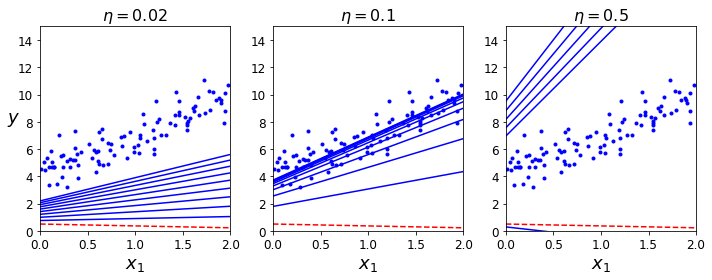

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo finalmente alcanzará la solución, pero llevará mucho tiempo. En el medio, la tasa de aprendizaje parece bastante buena: en solo unas pocas iteraciones, ya ha convergido a la solución. A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, salta por todos lados y, de hecho, se aleja cada vez más de la solución en cada paso. 

Para encontrar una buena tasa de aprendizaje, puede utilizar la búsqueda en cuadrícula. Sin embargo, es posible que desee limitar el número de iteraciones para que la búsqueda de cuadrícula pueda eliminar los modelos que tardan demasiado en converger. 

Quizás se pregunte cómo establecer el número de iteraciones. Si es demasiado bajo, aún estará lejos de la solución óptima cuando el algoritmo se detenga, pero si es demasiado alto, perderá tiempo mientras los parámetros del modelo ya no cambian. Una solución simple es establecer una gran cantidad de iteraciones pero interrumpir el algoritmo cuando el vector de gradiente se vuelve pequeño, es decir, cuando su norma se vuelve más pequeña que un número diminuto ϵ (llamado tolerancia), porque esto sucede cuando Gradient El descenso ha llegado (casi) al mínimo.

### Tasa de convergencia

Cuando la función de costo es convexa y su pendiente no cambia abruptamente (como es el caso de la función de costo MSE), Batch Gradient Descent con una tasa de aprendizaje fija eventualmente convergerá a la solución óptima, pero es posible que tenga que esperar un poco: puede tomar O (1/ϵ) iteraciones para alcanzar el óptimo dentro de un rango de ϵ dependiendo de la forma de la función de costo. Si divide la tolerancia por 10 para tener una solución más precisa, es posible que el algoritmo deba ejecutarse unas 10 veces más. 

# Stochastic Gradient Descent

El principal problema con Batch Gradient Descent es el hecho de que utiliza todo el conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo hace muy lento cuando el conjunto de entrenamiento es grande. En el extremo opuesto, Stochastic Gradient Descent solo elige una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basándose solo en esa única instancia. Obviamente, esto hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos para manipular en cada iteración. También hace posible entrenar en grandes conjuntos de entrenamiento, ya que solo una instancia necesita estar en la memoria en cada iteración (SGD se puede implementar como un algoritmo fuera del núcleo.)

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es mucho menos regular que Batch Gradient Descent: en lugar de disminuir suavemente hasta alcanzar el mínimo, la función de costo rebotará hacia arriba y hacia abajo, disminuyendo solo en promedio. Con el tiempo, terminará muy cerca del mínimo, pero una vez que llegue allí, continuará rebotando y nunca se asentará. Entonces, una vez que se detiene el algoritmo, los valores finales de los parámetros son buenos, pero no óptimos.

Stochastic Gradient Descent

![9](https://user-images.githubusercontent.com/63415652/104658893-54e90e00-5689-11eb-9976-c23bff509ab7.PNG)

Cuando la función de costo es muy irregular, esto puede ayudar al algoritmo a saltar de los mínimos locales, por lo que el Descenso de gradiente estocástico tiene más posibilidades de encontrar el mínimo global que el Descenso de gradiente por lotes.

Por lo tanto, la aleatoriedad es buena para escapar de los óptimos locales, pero mala porque significa que el algoritmo nunca puede establecerse en el mínimo. Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan siendo grandes (lo que ayuda a avanzar rápidamente y escapar de los mínimos locales), luego se vuelven cada vez más pequeños, lo que permite que el algoritmo se establezca en el mínimo global. Este proceso es similar al recocido simulado, un algoritmo inspirado en el proceso de recocido en metalurgia donde el metal fundido se enfría lentamente. La función que determina la tasa de aprendizaje en cada iteración se llama programa de aprendizaje. Si la tasa de aprendizaje se reduce demasiado rápido, puede quedarse atascado en un mínimo local o incluso terminar congelado a la mitad del mínimo. Si la tasa de aprendizaje se reduce demasiado lentamente, puede saltar alrededor del mínimo durante mucho tiempo y terminar con una solución subóptima si detiene el entrenamiento demasiado pronto. 

Este código implementa el descenso de gradiente estocástico usando un programa de aprendizaje simple:

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Por convención iteramos por rondas de m iteraciones; cada ronda se llama época. Mientras que el código Batch Gradient Descent se repitió 1000 veces a través de todo el conjunto de entrenamiento, este código pasa por el conjunto de entrenamiento solo 50 veces y alcanza una solución bastante buena:

In [20]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

Aquí se muestra los primeros 20 pasos del entrenamiento (observe cuál irregulares son los pasos).

Saving figure sgd_plot


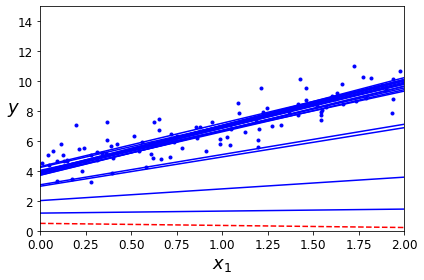

In [21]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

Tenga en cuenta que, dado que las instancias se seleccionan al azar, algunas instancias pueden elegirse varias veces por época, mientras que otras pueden no seleccionarse en absoluto. Si quieres estar seguro de que el algoritmo pasa por cada instancia en cada época, otro enfoque es mezclar el conjunto de entrenamiento (asegurándote de mezclar las características de entrada y las etiquetas de manera conjunta), luego revisarlo instancia por instancia, luego mezclarlo de nuevo, y así sucesivamente. Sin embargo, esto generalmente converge más lentamente.

>Cuando se usa el descenso de gradiente estocástico, las instancias de entrenamiento deben ser independientes y distribuidas de manera idéntica (IID), para garantizar que los parámetros se acerquen al óptimo global, en promedio. Una forma sencilla de garantizar esto es barajar las instancias durante el entrenamiento (por ejemplo, elegir cada instancia al azar o mezclar el conjunto de entrenamiento al comienzo de cada época). Si no hace esto, por ejemplo, si las instancias están ordenadas por etiqueta, entonces SGD comenzará optimizando para una etiqueta, luego la siguiente, y así sucesivamente, y no se acercará al mínimo global.

Para realizar una regresión lineal usando SGD con Scikit-Learn, puede usar la clase SGDRegressor, que por defecto optimiza la función de costo de error al cuadrado. El siguiente código se ejecuta durante un máximo de 1000 épocas (max_iter = 1000) o hasta que la pérdida disminuya en menos de 1e-3 durante una época (tol = 1e-3), comenzando con una tasa de aprendizaje de 0.1 (eta0 = 0.1), usando el horario de aprendizaje predeterminado (diferente del anterior), y no usa ninguna regularización (penalización = Ninguna; más detalles sobre esto en breve):

In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

Una vez más, encuentra una solución bastante cercana a la devuelta por la Ecuación Normal:

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# Descenso de gradiente de mini lotes

El último algoritmo de Gradient Descent que veremos se llama Gradient Descent por mini lotes. Es bastante simple de entender una vez que se conoce el descenso de gradientes por lotes y estocástico: en cada paso, en lugar de calcular los gradientes basados en el conjunto de entrenamiento completo (como en GD por lotes) o basados en una sola instancia (como en el estocástico GD), Minibatch GD calcula los gradientes en pequeños conjuntos aleatorios de instancias llamados minibatches. La principal ventaja de Mini-batch GD sobre Stochastic GD es que puede obtener un aumento del rendimiento de la optimización del hardware de las operaciones matriciales, especialmente cuando se utilizan GPU.

El progreso del algoritmo en el espacio de parámetros es menos errático que con SGD, especialmente con mini lotes bastante grandes. Como resultado, Mini-batch GD terminará caminando un poco más cerca del mínimo que SGD. Pero, por otro lado, puede resultarle más difícil escapar de los mínimos locales (en el caso de problemas que sufren de mínimos locales, a diferencia de la Regresión lineal como vimos anteriormente). El siguiente grafico muestra las rutas tomadas por los tres algoritmos de descenso de gradiente en el espacio de parámetros durante el entrenamiento. Todos terminan cerca del mínimo, pero el camino de Batch GD en realidad se detiene en el mínimo, mientras que tanto Stochastic GD como Mini-batch GD continúan caminando. Sin embargo, no olvide que la GD por lotes requiere mucho tiempo para dar cada paso, y la GD estocástica y la GD por mini lotes también alcanzarían el mínimo si utilizara un buen programa de aprendizaje.  

Rutas de descenso de gradientes en el espacio de parámetros

In [24]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [26]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


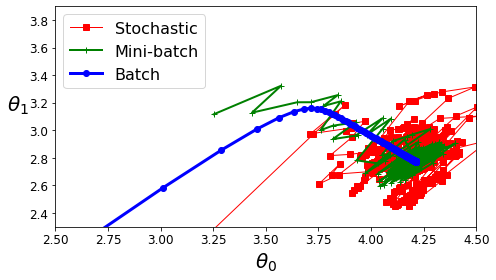

In [27]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Ahora vamos a comparar los algoritmos que hemos discutido hasta ahora para Regresión lineal (recuerde que m es el número de instancias de entrenamiento y n es el número de características)

Comparación de algoritmos para regresión lineal

![10](https://user-images.githubusercontent.com/63415652/104665724-b6b07480-5697-11eb-98f2-26a52a880dd1.PNG) 

>Casi no hay diferencia después del entrenamiento: todos estos algoritmos terminan con modelos muy similares y hacen predicciones exactamente de la misma manera.